# **Loading the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score

# **Data loading & processing**

In [ ]:
df = pd.read_csv('prices-split-adjusted.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['symbol'].unique().shape

(501,)

In [ ]:
df['symbol'].value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [ ]:
label_encoding = LabelEncoder()
df['symbol'] = label_encoding.fit_transform(df['symbol'])

# **EDA**

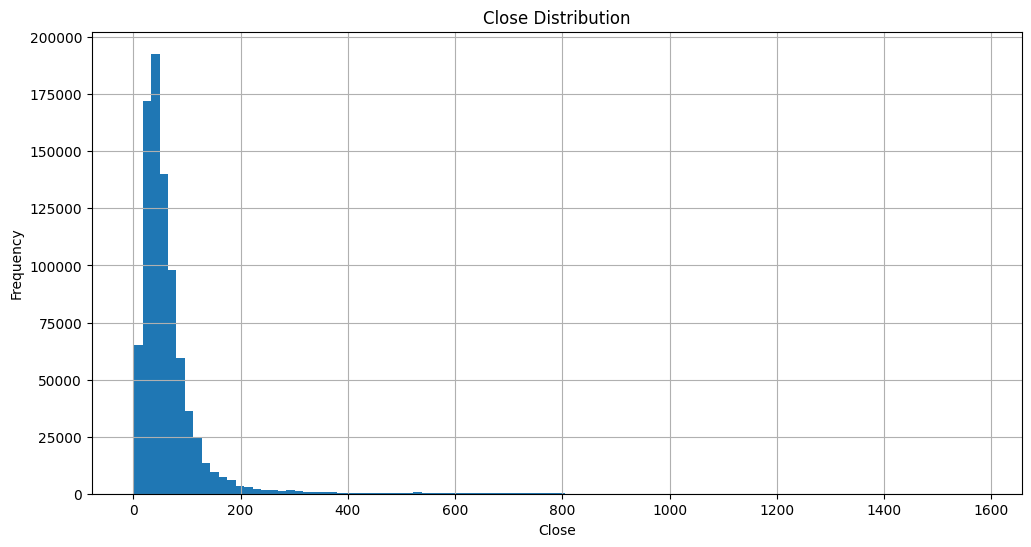

In [ ]:
plt.figure(figsize=(12, 6))
df['close'].hist(bins=100)
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Close Distribution')
plt.show()

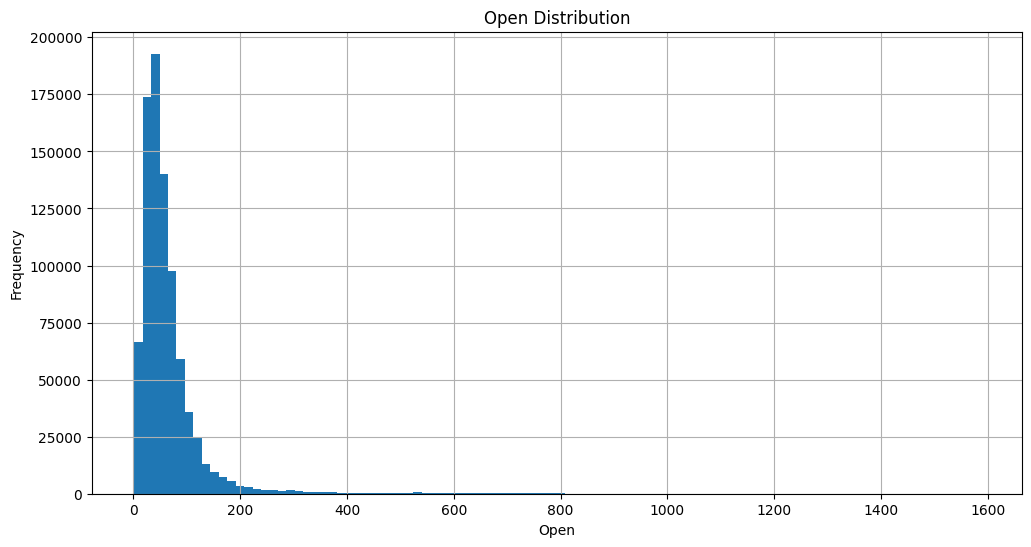

In [ ]:
plt.figure(figsize=(12, 6))
df['open'].hist(bins=100)
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.title('Open Distribution')
plt.show()

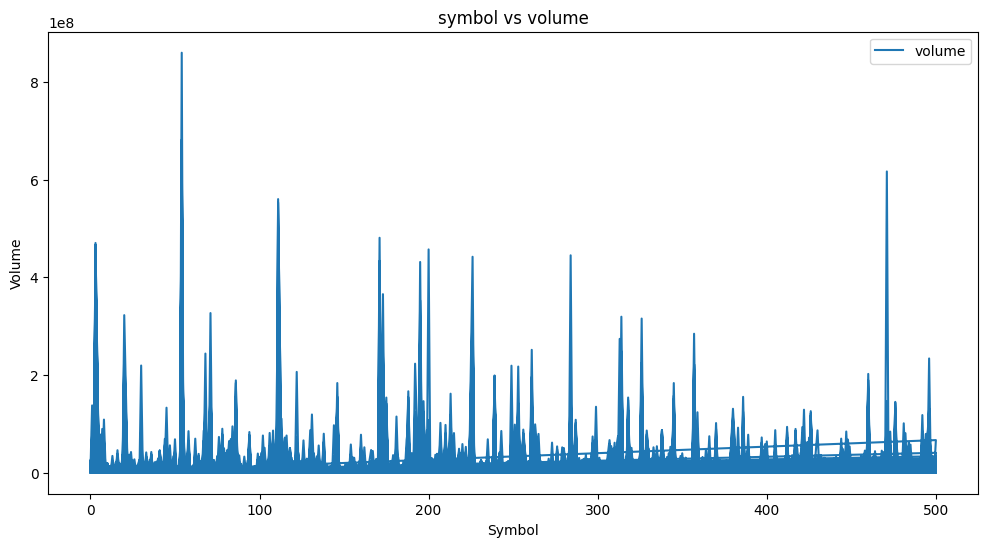

In [ ]:
df.plot(x='symbol', y='volume', figsize=(12, 6), title='symbol vs volume')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.show()

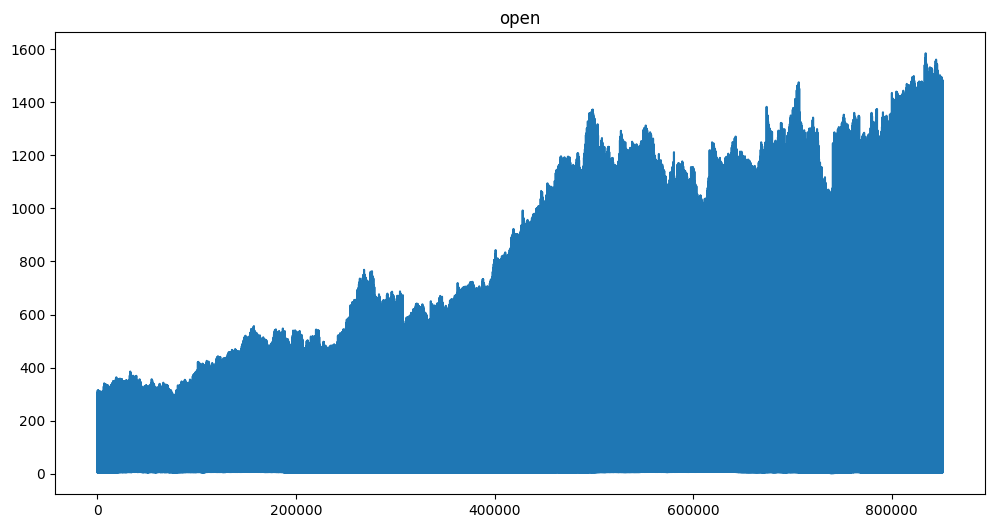

In [ ]:
df['open'].plot(kind='line', figsize=(12, 6), title='open')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.show()

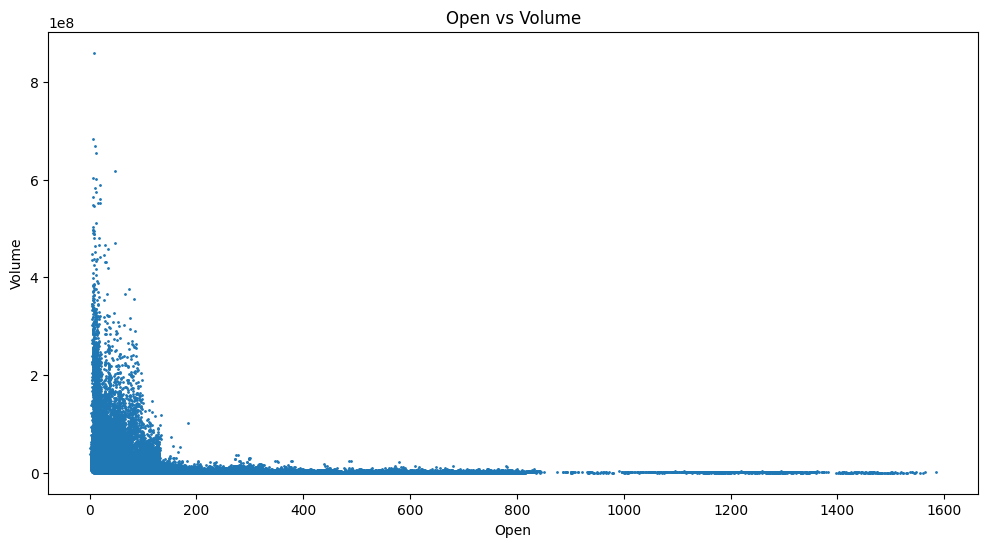

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['open'], df['volume'], s=1)
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Open vs Volume')
plt.show()

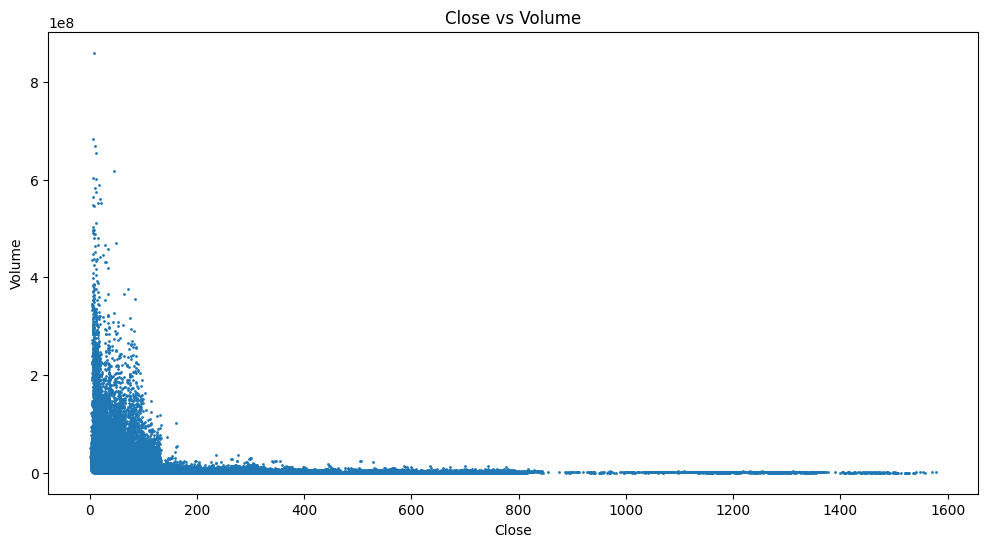

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['close'], df['volume'], s=1)
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Close vs Volume')
plt.show()

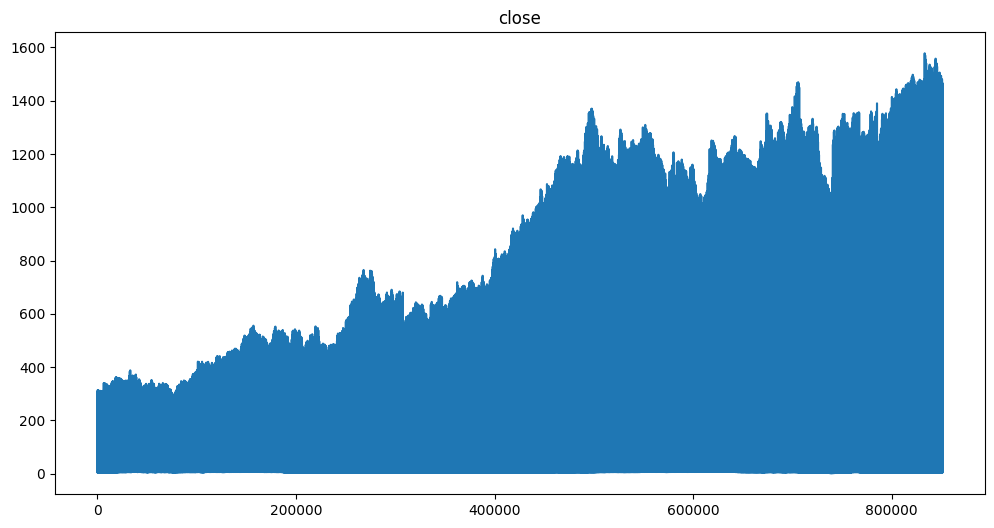

In [ ]:
df['close'].plot(kind='line', figsize=(12, 6), title='close')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.show()

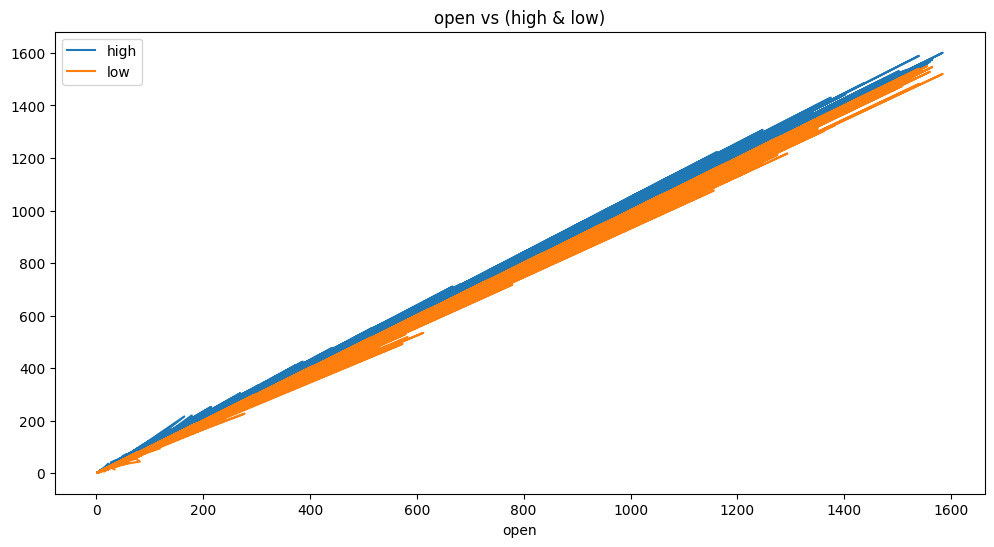

In [ ]:
df.plot(x='open', y=['high','low'], figsize=(12, 6), title='open vs (high & low)')
plt.show()

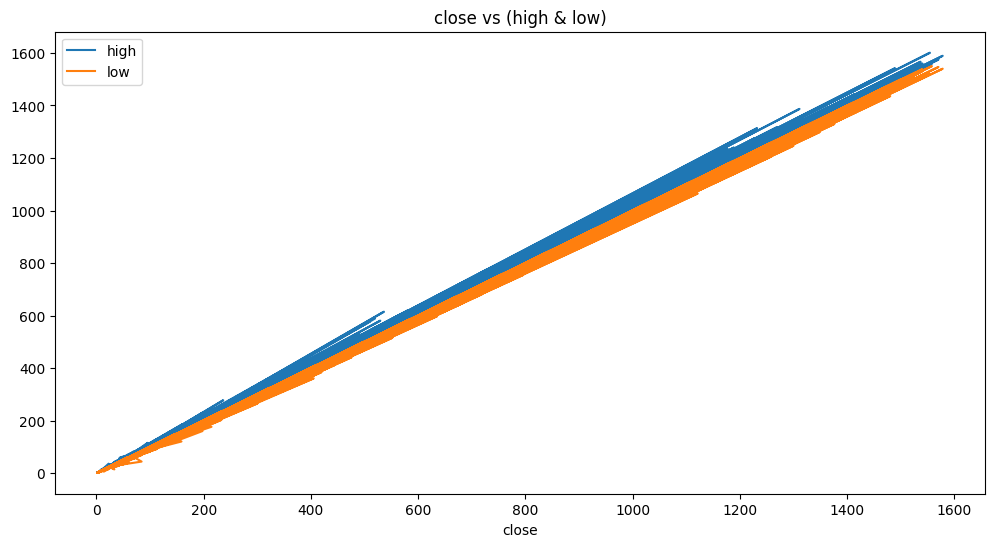

In [ ]:
df.plot(x='close', y=['high','low'], figsize=(12, 6), title='close vs (high & low)')
plt.show()

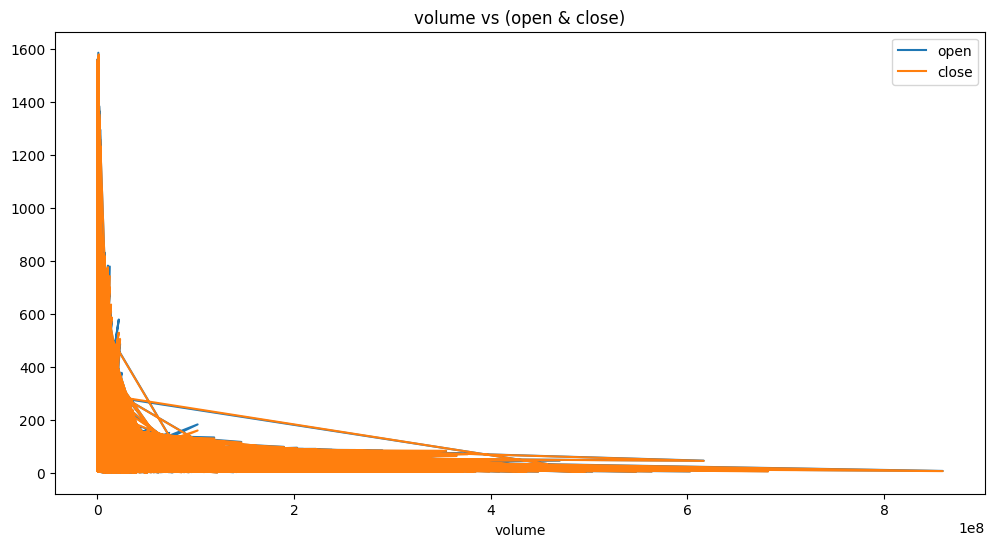

In [ ]:
df.plot(x='volume', y=['open','close'], figsize=(12, 6), title='volume vs (open & close)')
plt.show()

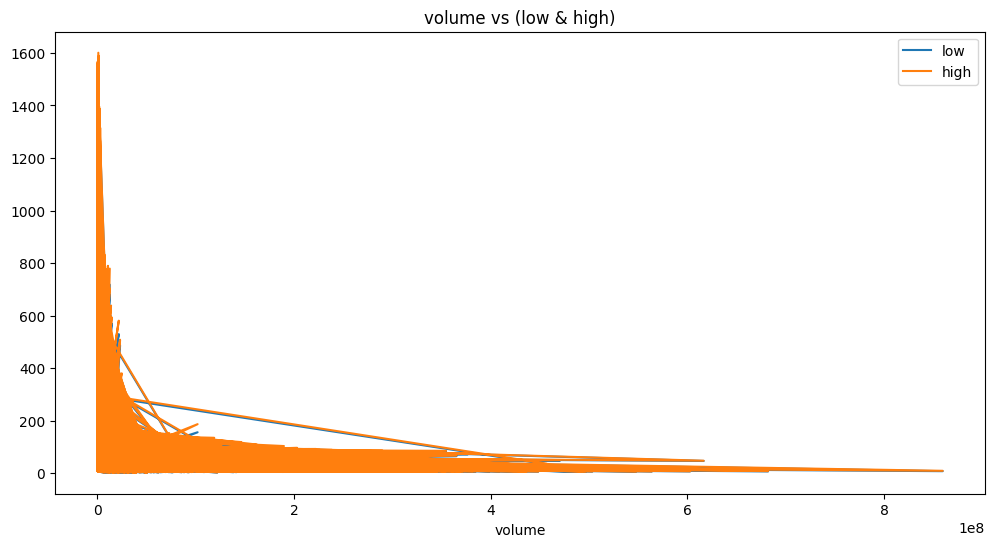

In [ ]:
df.plot(x='volume', y=['low','high'], figsize=(12, 6), title='volume vs (low & high)')
plt.show()

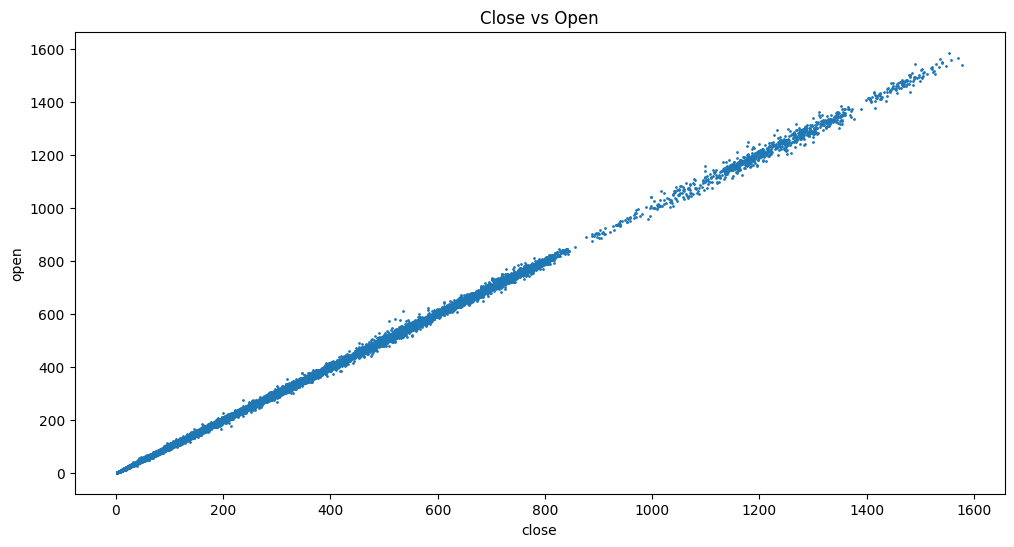

In [ ]:
df.plot(x='close', y='open',  kind='scatter', figsize=(12, 6), title='Close vs Open', s=1)
plt.show()

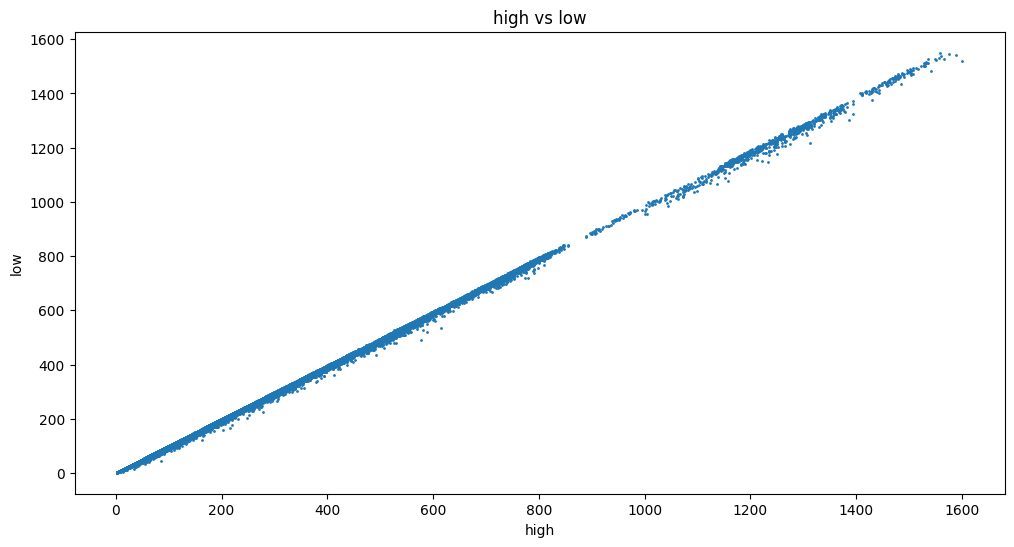

In [ ]:
df.plot(x='high', y='low',  kind='scatter', figsize=(12, 6), title='high vs low',s=1)
plt.show()

<Axes: >

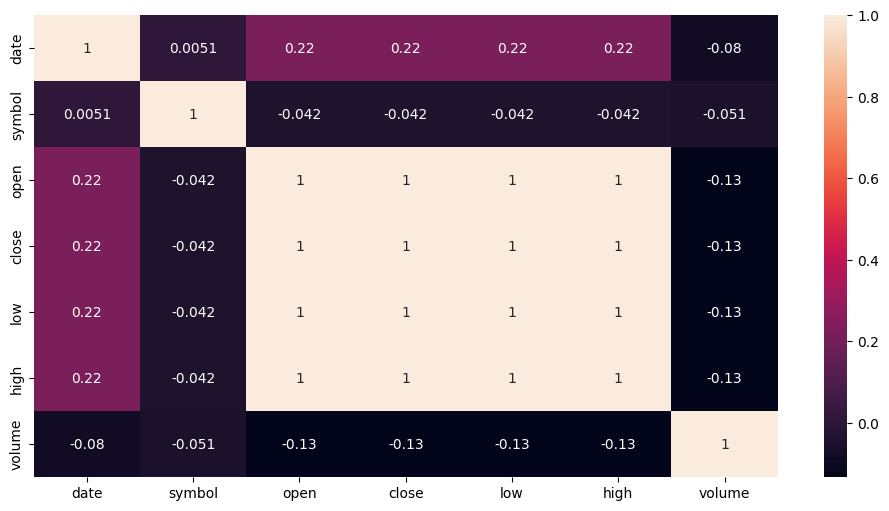

In [ ]:
plt.figure(figsize=(12, 6))
cormap = df.corr()
sns.heatmap(cormap, annot = True)

In [ ]:
x=df[['open','high','low','volume','symbol']]
y=df['close']

In [ ]:
x

,open,high,low,volume,symbol
0,123.430000,126.250000,122.309998,2163600.0,479
1,125.239998,125.540001,119.940002,2386400.0,479
2,116.379997,119.739998,114.930000,2489500.0,479
3,115.480003,117.440002,113.500000,2006300.0,479
4,117.010002,117.330002,114.089996,1408600.0,479
...,...,...,...,...,...
851259,103.309998,103.930000,102.849998,973800.0,498
851260,43.070000,43.310001,42.689999,1938100.0,499
851261,53.639999,53.740002,53.270000,1701200.0,500
851262,44.730000,45.590000,44.410000,1380900.0,21


In [ ]:
y

0         125.839996
1         119.980003
2         114.949997
3         116.620003
4         114.970001
             ...    
851259    103.199997
851260     43.040001
851261     53.529999
851262     45.450001
851263     53.630001
Name: close, Length: 851264, dtype: float64

# **Splitting the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(x_test)

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)*100
rmse_lr = np.sqrt(mse_lr)
mse_lr, mae_lr, r2_lr, rmse_lr

(0.3469571369782399, 0.291534679076536, 99.9938341504669, 0.5890306757531732)

In [ ]:
lr_acc = lr_model.score(x_test, y_test)*100
lr_acc

99.9938341504669

Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)*100
rmse_rf = np.sqrt(mse_rf)
mse_rf, mae_rf, r2_rf, rmse_rf

(0.4354866731796768, 0.3030662934016608, 99.99226087313296, 0.6599141407635366)

Neural Network

In [ ]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(128, input_dim = x_train_scaled.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

In [ ]:
nn_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
Tr_nn = nn_model.fit(x_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
7981/7981 [==============================] - 27s 3ms/step - loss: 166.4396 - val_loss: 3.7861
Epoch 2/100
7981/7981 [==============================] - 24s 3ms/step - loss: 67.0308 - val_loss: 27.0850
Epoch 3/100
7981/7981 [==============================] - 22s 3ms/step - loss: 54.8951 - val_loss: 29.8598
Epoch 4/100
7981/7981 [==============================] - 26s 3ms/step - loss: 42.4854 - val_loss: 118.0109
Epoch 5/100
7981/7981 [==============================] - 34s 4ms/step - loss: 29.3307 - val_loss: 493.1143
Epoch 6/100
7981/7981 [==============================] - 23s 3ms/step - loss: 24.9065 - val_loss: 290.8518
Epoch 7/100
7981/7981 [==============================] - 24s 3ms/step - loss: 21.9528 - val_loss: 267.2773
Epoch 8/100
7981/7981 [==============================] - 22s 3ms/step - loss: 21.9386 - val_loss: 217.1923
Epoch 9/100
7981/7981 [==============================] - 26s 3ms/step - loss: 21.2594 - val_loss: 331.1723
Epoch 10/100
7981/7981 [================

In [ ]:
y_pred_nn = nn_model.predict(x_test_scaled)

6651/6651 [==============================] - 11s 2ms/step


In [ ]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)*100
rmse_nn = np.sqrt(mse_nn)
mse_nn, mae_nn, r2_nn, rmse_nn

(3.6985387246219457, 1.2298896007622853, 99.9342724768051, 1.923158528208724)

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network'],
    'MSE': [mse_lr, mse_rf, mse_nn],
    'R²': [r2_lr, r2_rf, r2_nn],
    'MAE': [mae_lr, mae_rf, mae_nn],
    'RMSE': [rmse_lr, rmse_rf, rmse_nn]
})
results

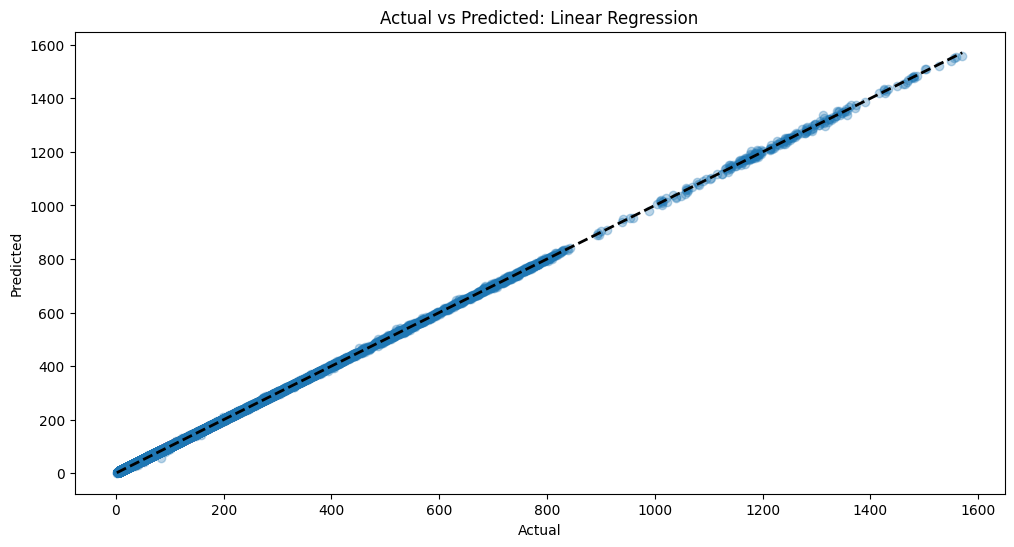

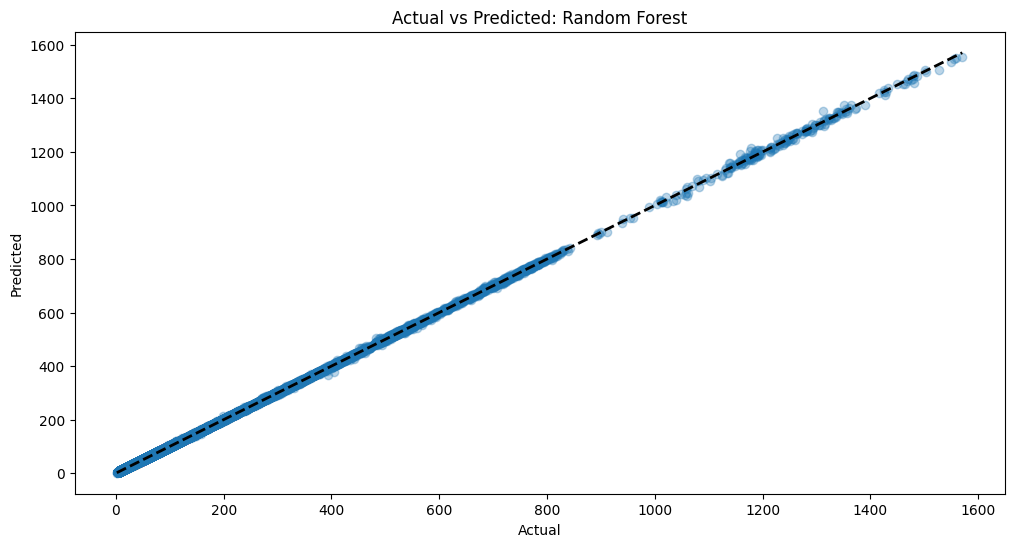

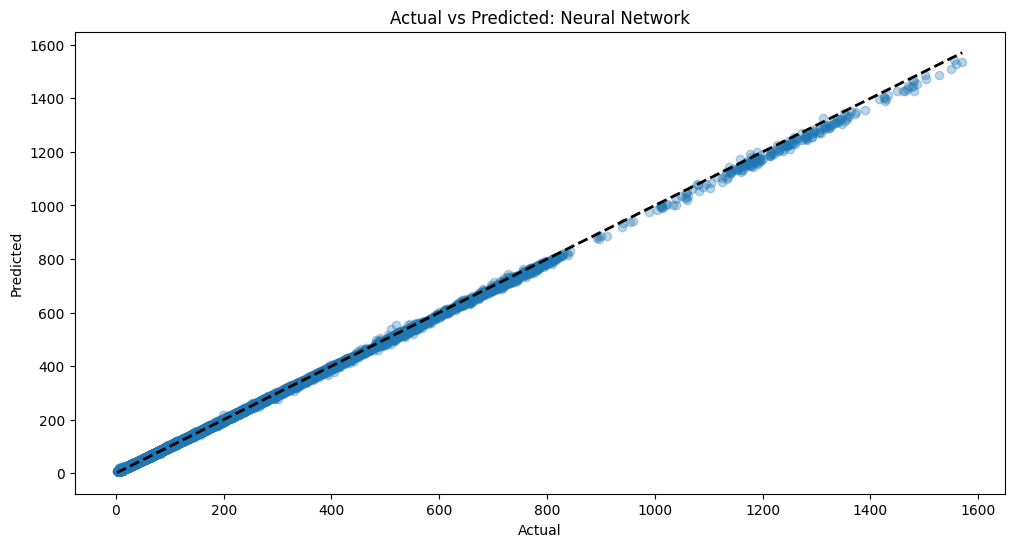

In [ ]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {model_name}')
    plt.show()

plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression')
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest')
plot_actual_vs_predicted(y_test, y_pred_nn, 'Neural Network')

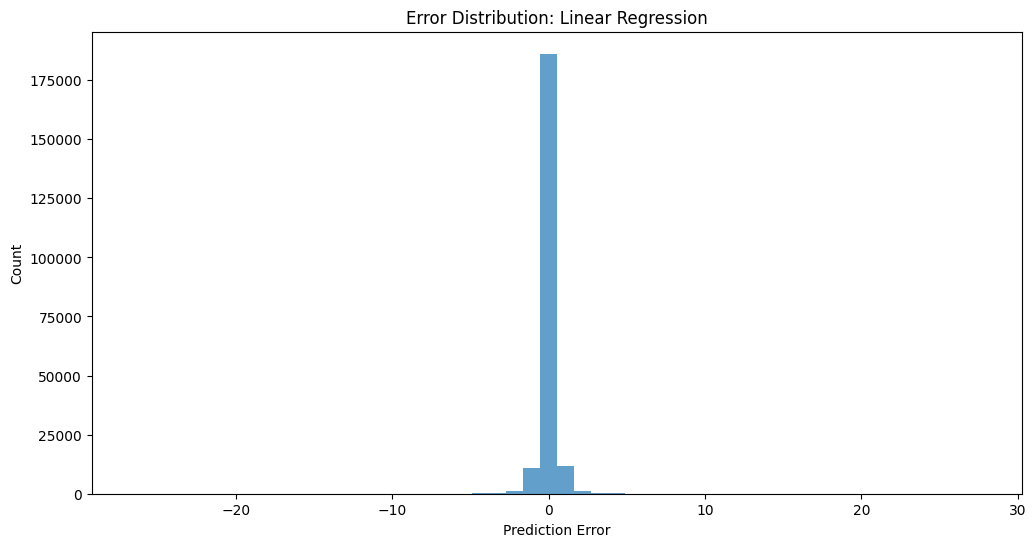

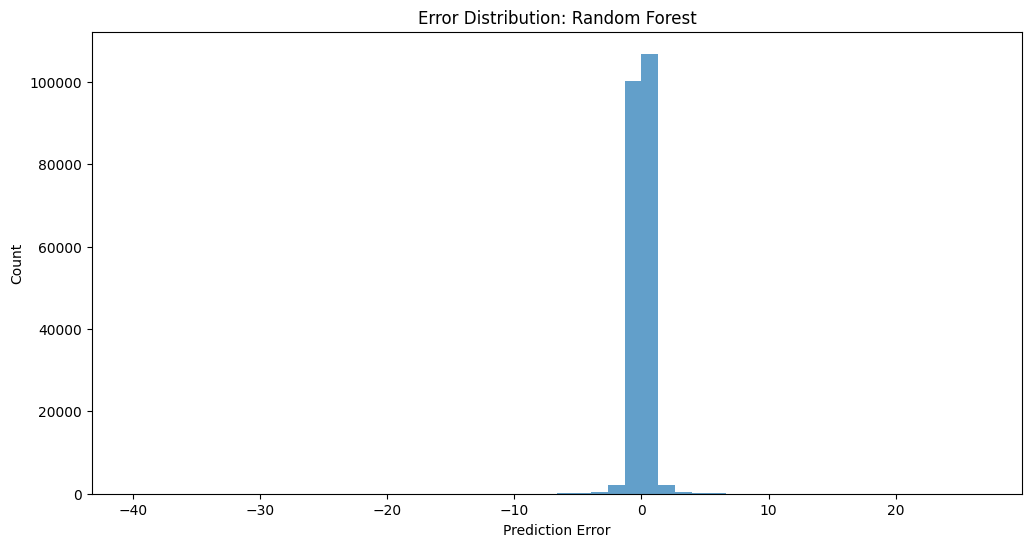

In [ ]:
def plot_error_distribution(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(12, 6))
    plt.hist(errors, bins=50, alpha=0.7)
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title(f'Error Distribution: {model_name}')
    plt.show()

plot_error_distribution(y_test, y_pred_lr, 'Linear Regression')
plot_error_distribution(y_test, y_pred_rf, 'Random Forest')
plot_error_distribution(y_test, y_pred_nn, 'Neural Network')